# Minesweeper Bot Analysis
Primarily an analysis of my probabilistic strategy.

Data collection overview:
- 9x9 grid, varying the number of mines from 0 to 81. 
- 1000 trials per distinct density (so 82000 games simulated).

Insights:
1. Runtime by density
2. Win rate by density
3. Turns taken to win by density
    - How many tiles are cleared?
4. Turns taken to lose by density
    - How many tiles are cleared?
    - How many tiles are left?

Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read data

In [2]:
df = pd.read_csv("../data/test.csv")
df

,numRows,numColumns,initialDensity,numMines,status,numMoves,numTilesCleared,elapsedMillis
0,9,9,0.0,0,WIN,1,81,7
1,9,9,0.0,0,WIN,1,81,0
2,9,9,0.0,0,WIN,1,81,1
3,9,9,0.0,0,WIN,1,81,1
4,9,9,0.0,0,WIN,1,81,1
...,...,...,...,...,...,...,...,...
81995,9,9,1.0,81,LOSE,1,0,1
81996,9,9,1.0,81,LOSE,1,0,0
81997,9,9,1.0,81,LOSE,1,0,0
81998,9,9,1.0,81,LOSE,1,0,0


### 1. Win rate

In [3]:
def win_rate(group):
    return pd.Series({"winRate": len(group[group["status"] == "WIN"]) / len(group["status"])})

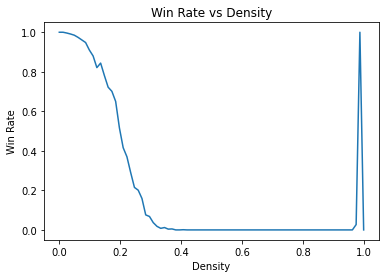

In [4]:
winrate_series = df.groupby(["initialDensity"]).apply(lambda x : win_rate(x))["winRate"]
plt.plot(winrate_series)
plt.xlabel("Density")
plt.ylabel("Win Rate")
plt.title("Win Rate vs Density")
plt.show()

There is a spike at numMines = 80 because we are guaranteed to start on a non-mine, and this is the only non-mine there is.

### Runtime

In [5]:
mean_runtime_series = df.groupby(["initialDensity"]).mean("elapsedMillis")["elapsedMillis"]
mean_runtime_series.max()

14.228

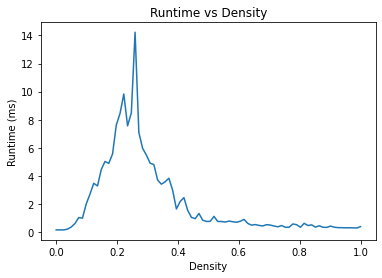

In [6]:
plt.plot(mean_runtime_series)
plt.xlabel("Density")
plt.ylabel("Runtime (ms)")
plt.title("Runtime vs Density")
plt.show()